## Tensors

In [ ]:
from __future__ import print_function
import torch

In [3]:
x = torch.Tensor(5, 3)
print(x)


 0.0000e+00 -1.5846e+29 -8.8764e-07
-2.8586e-42  1.1210e-44  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
 0.0000e+00  0.0000e+00  0.0000e+00
[torch.FloatTensor of size 5x3]



In [4]:
print(x.size())

torch.Size([5, 3])


In [5]:
y = torch.rand(5, 3)
print(x+y)


 4.9380e-01 -1.5846e+29  7.1417e-01
 8.8007e-01  8.1709e-01  3.3673e-01
 6.4274e-01  6.6902e-01  8.8351e-01
 3.5433e-01  6.9490e-01  7.2842e-01
 9.7084e-02  4.3087e-01  8.2198e-01
[torch.FloatTensor of size 5x3]



## Operations
- any operation prefixed with a `_` mutates tensor in place.



In [9]:
x = torch.randn(4,4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [18]:
# convert to numpy
x = torch.randn(4,4)
a = x.numpy()
print(a)
b = a.dot(a)
y = torch.from_numpy(b)
print(y)

[[-1.9508364  -1.4521385   1.0386069  -0.46838382]
 [-0.627005    1.266949   -0.0566349  -0.98054343]
 [ 0.5057412  -1.5516381  -0.8547591  -1.065618  ]
 [ 1.1434191   0.28261024 -0.06029048  1.045478  ]]

 4.7060 -0.7508 -2.8034  0.7412
-0.7210  2.3264 -0.6154 -1.9134
-1.6645 -1.6751  1.4080  1.0813
-1.2429 -0.9133  1.1601  0.3446
[torch.FloatTensor of size 4x4]



## Autograd
- provides automatic differentiation for all operators


In [19]:
import torch
from torch.autograd import Variable

x = Variable(torch.ones(2,2), requires_grad=True)
print(x)

Variable containing:
 1  1
 1  1
[torch.FloatTensor of size 2x2]



In [20]:
y = x +2
print(y)

Variable containing:
 3  3
 3  3
[torch.FloatTensor of size 2x2]



In [23]:
print(y.grad_fn)

In [24]:
z = y * y * 3 
out = z.mean()
print(z, out)

Variable containing:
 27  27
 27  27
[torch.FloatTensor of size 2x2]
 Variable containing:
 27
[torch.FloatTensor of size 1]



In [26]:
out.backward()

In [27]:
print(x.grad)

Variable containing:
 4.5000  4.5000
 4.5000  4.5000
[torch.FloatTensor of size 2x2]



## Neural Networks

In [29]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

In [30]:
class Net(nn.Module):
    
    def __init__(self):
        super(Net, self).__init__()
        
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        
        x = F.max_pool2d(F.relu(self.conv2((x))), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
    def num_flat_features(self, x):
        size = x.size()[1:]
        num_features = 1
        for s in size:
            num_features *= s
        return num_features
    
    

In [31]:
net = Net()
print(net)

Net(
  (conv1): Conv2d (1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d (6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120)
  (fc2): Linear(in_features=120, out_features=84)
  (fc3): Linear(in_features=84, out_features=10)
)


In [32]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [54]:
input = Variable(torch.randn(1, 1, 32, 32))
out = net(input)
print(out)

Variable containing:
 0.0325 -0.0740 -0.0017 -0.1390 -0.0382  0.1340  0.0226 -0.0770 -0.0806 -0.0467
[torch.FloatTensor of size 1x10]



In [55]:
target = Variable(torch.arange(1, 11))
criterion = nn.MSELoss()
print(type(criterion))
loss = criterion(out, target)
print(loss)

<class 'torch.nn.modules.loss.MSELoss'>
Variable containing:
 38.8490
[torch.FloatTensor of size 1]



In [56]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [57]:
net.zero_grad()
print(net.conv1.bias.grad)
loss.backward()
print(net.conv1.bias.grad)

Variable containing:
 0
 0
 0
 0
 0
 0
[torch.FloatTensor of size 6]

Variable containing:
-0.0988
 0.0697
-0.0933
-0.0515
 0.1494
-0.0822
[torch.FloatTensor of size 6]



In [60]:
import torch.optim as optim

# create your optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zero the gradient buffers
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Does the update

## Training a classifier

In [65]:
import torch
import torchvision
import torchvision.transforms as transforms

In [66]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


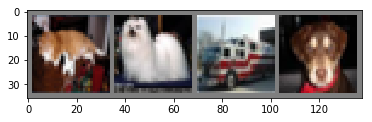

  dog   dog truck   dog


In [72]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
plt.show()
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [67]:
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [68]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [79]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.197
[1,  4000] loss: 1.185
[1,  6000] loss: 1.194
[1,  8000] loss: 1.154
[1, 10000] loss: 1.172
[1, 12000] loss: 1.161
[2,  2000] loss: 1.077
[2,  4000] loss: 1.055
[2,  6000] loss: 1.078
[2,  8000] loss: 1.093
[2, 10000] loss: 1.086
[2, 12000] loss: 1.097
[3,  2000] loss: 0.996
[3,  4000] loss: 1.025
[3,  6000] loss: 1.011
[3,  8000] loss: 1.007
[3, 10000] loss: 0.995
[3, 12000] loss: 0.986
[4,  2000] loss: 0.912
[4,  4000] loss: 0.930
[4,  6000] loss: 0.934
[4,  8000] loss: 0.943
[4, 10000] loss: 0.961
[4, 12000] loss: 0.973
[5,  2000] loss: 0.835
[5,  4000] loss: 0.883
[5,  6000] loss: 0.900
[5,  8000] loss: 0.906
[5, 10000] loss: 0.917
[5, 12000] loss: 0.924
[6,  2000] loss: 0.804
[6,  4000] loss: 0.821
[6,  6000] loss: 0.865
[6,  8000] loss: 0.858
[6, 10000] loss: 0.873
[6, 12000] loss: 0.919
[7,  2000] loss: 0.779
[7,  4000] loss: 0.807
[7,  6000] loss: 0.801
[7,  8000] loss: 0.825
[7, 10000] loss: 0.846
[7, 12000] loss: 0.843
[8,  2000] loss: 0.751
[8,  4000] 

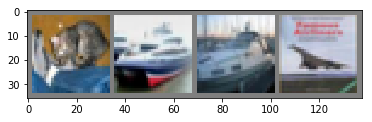

GroundTruth:    cat  ship  ship plane


In [80]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
plt.show()
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))



In [81]:
outputs = net(Variable(images))
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car plane


In [82]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 63 %


In [83]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 71 %
Accuracy of   car : 75 %
Accuracy of  bird : 63 %
Accuracy of   cat : 45 %
Accuracy of  deer : 56 %
Accuracy of   dog : 36 %
Accuracy of  frog : 68 %
Accuracy of horse : 67 %
Accuracy of  ship : 70 %
Accuracy of truck : 78 %
